In [7]:
import numpy as np
import csv
import logs
import matplotlib.pyplot as plt
from Bandit import Bandit
plt.style.use('ggplot')

In [8]:
Bandit_Reward=[1,2,3,4] 
NumberOfTrials: 20000

In [9]:
class EpsilonGreedy(Bandit):
    def __init__(self, p, epsilon=0.3):
        self.N = len(p)
        self.total_reward = 0
        self.k = np.zeros(self.N)
        self.epsilon = epsilon
        self.average_reward = np.zeros(self.N)
        self.rewards = []

    def __repr__(self):
        return f"EpsilonGreedy(epsilon={self.epsilon}, N={self.N}, mean_reward={self.average_reward})"

    def pull(self):
        if np.random.rand() < self.epsilon:
            selected_bandit = np.random.choice(self.N)
        else:
            # Exploit strategy: selecting the one with the highest average reward
            selected_bandit = np.argmax(self.average_reward)
        reward = Bandit_Reward[selected_bandit]
        self.rewards.append((selected_bandit, reward, "EpsilonGreedy"))
        return selected_bandit, reward

    def update(self, selected_bandit, reward):
        self.k[selected_bandit] += 1
        alpha = 1.0 / self.k[selected_bandit]
        self.average_reward[selected_bandit] += alpha * (reward - self.average_reward[selected_bandit])
        self.total_reward += reward

    def experiment(self, trials=20000):
        for t in range(1, trials + 1):
            selected_bandit, reward = self.pull()
            self.update(selected_bandit, reward)
            self.epsilon = max(self.epsilon / t, 0.03)

    def report(self):

        with open("rewards.csv", "w", newline="") as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(["Bandit", "Reward", "Algorithm"])
            writer.writerows(self.rewards)

        optimal_reward = max(Bandit_Reward)
        mean_reward = self.total_reward / sum(self.k)
        mean_regret = optimal_reward - mean_reward
        print(f"Average Reward: {mean_reward:.2f}")
        print(f"Average Regret: {mean_regret:.2f}")


In [10]:
class ThompsonSampling(Bandit):
    def __init__(self, p):
        self.N = len(p)
        self.total_reward = 0
        self.alpha = np.ones(self.N)
        self.beta = np.ones(self.N)
        self.rewards = []

    def __repr__(self):
        return f"ThompsonSampling(N={self.N}, alpha={self.alpha}, beta={self.beta})"
    
    def pull(self):
        sampled_values = [np.random.beta(self.alpha[i], self.beta[i]) for i in range(self.N)]
        selected_bandit = np.argmax(sampled_values)
        reward = Bandit_Reward[selected_bandit]
        self.rewards.append((selected_bandit, reward, "ThompsonSampling"))
        return selected_bandit, reward

    def update(self, selected_bandit, reward):
        if reward > 0:
            self.alpha[selected_bandit] += 1
        else:
            self.beta[selected_bandit] += 1
        self.total_reward += reward


    def experiment(self, trials=20000):
        for _ in range(trials):
            selected_bandit, reward = self.pull()
            self.update(selected_bandit, reward)

    def report(self):
        with open("rewards.csv", "a", newline="") as csvfile:
            writer = csv.writer(csvfile)
            writer.writerows(self.rewards)

        optimal_reward = max(Bandit_Reward)
        mean_reward = self.total_reward / (sum(self.alpha) + sum(self.beta) - 2 * self.N)
        mean_regret = optimal_reward - mean_reward
        print(f"Average Reward: {mean_reward:.3f}")
        print(f"Average Regret: {mean_regret:.3f}")


In [11]:
class Visualization():

    def first_graph(self, eg_rewards, ts_rewards):
        eg_cumulative_rewards = np.cumsum([reward for _, reward, _ in eg_rewards])
        ts_cumulative_rewards = np.cumsum([reward for _, reward, _ in ts_rewards])
        
        eg_avg_rewards = eg_cumulative_rewards / (np.arange(len(eg_rewards)) + 1)
        ts_avg_rewards = ts_cumulative_rewards / (np.arange(len(ts_rewards)) + 1)

        plt.figure(figsize=(12, 6))
        plt.plot(eg_avg_rewards, label="Epsilon-Greedy")
        plt.plot(ts_avg_rewards, label="Thompson Sampling")
        plt.xlabel("Trials")
        plt.ylabel("Average Reward")
        plt.title("Learning Process | E-Greedy and Thompson Sampling")
        plt.legend()
        plt.grid(True)
        plt.show()

    def second_graph(self, eg_rewards, ts_rewards):
        eg_cumulative_rewards = np.cumsum([reward for _, reward, _ in eg_rewards])
        ts_cumulative_rewards = np.cumsum([reward for _, reward, _ in ts_rewards])

        plt.figure(figsize=(12, 6))
        plt.plot(eg_cumulative_rewards, label="Epsilon-Greedy")
        plt.plot(ts_cumulative_rewards, label="Thompson Sampling")
        plt.xlabel("Trials")
        plt.ylabel("Cumulative Reward")
        plt.title("Cumulative Rewards | E-Greedy and Thompson Sampling")
        plt.legend()
        plt.grid(True)
        plt.show()


Average Reward: 3.94
Average Regret: 0.06
Average Reward: 2.371
Average Regret: 1.629


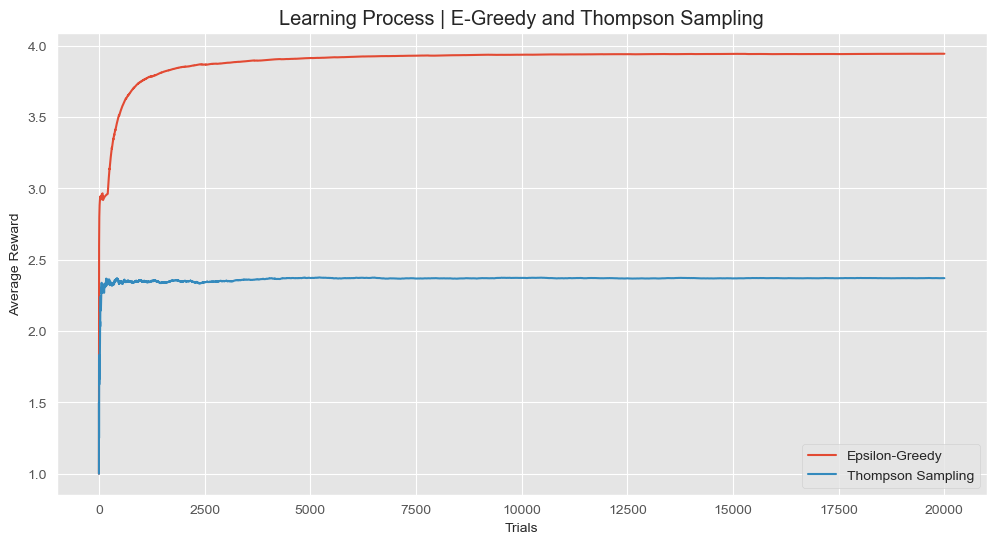

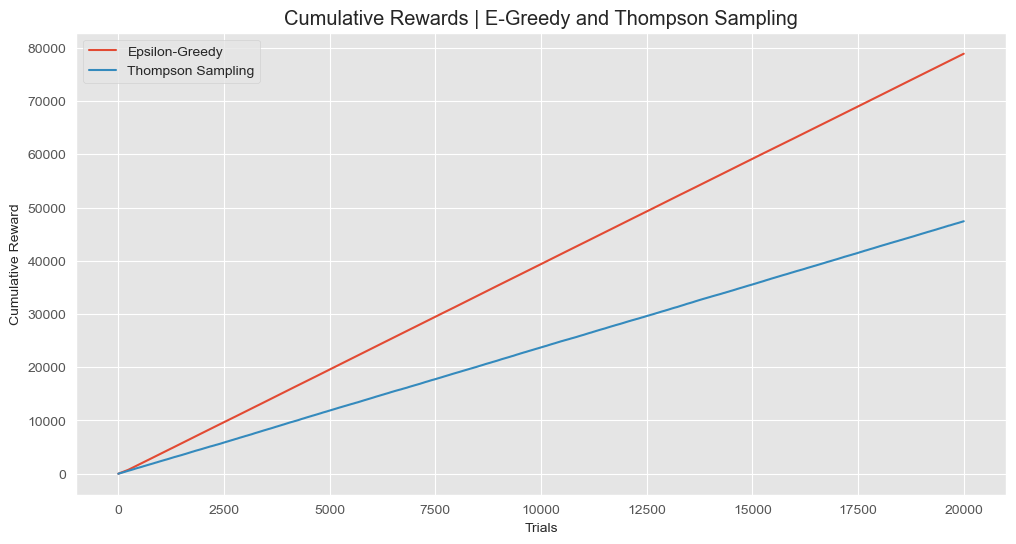

In [12]:
eg = EpsilonGreedy(Bandit_Reward)
ts = ThompsonSampling(Bandit_Reward)

eg.experiment()
ts.experiment()

eg.report()
ts.report()

viz = Visualization()
viz.first_graph(eg.rewards, ts.rewards)
viz.second_graph(eg.rewards, ts.rewards)

